In [1]:
import scanpy as sc

In [33]:
adata_full = sc.read_h5ad("/home/icb/dominik.klein/git_repos/ot_pert_new/notebooks/prepare_data/data/combosciplex.h5ad")

In [23]:
adata = sc.read_h5ad("/home/icb/dominik.klein/git_repos/ot_pert_new/notebooks/prepare_data/data/combosciplex.h5ad")

In [24]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [25]:
adata.obs.head()

,sample,Size_Factor,n.umi,RT_well,Drug1,Drug2,Well,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,condition,pathway1,pathway2,split,control,cell_type
Cell,,,,,,,,,,,,,,,,,,,
A01_A02_RT_BC_10_Lig_BC_18,sciPlex_theis,0.533816,1433,RT_10,control,Panobinostat,A10,1004,1004,1433.0,51.0,3.558967,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_25,sciPlex_theis,0.539404,1448,RT_10,control,Panobinostat,A10,1062,1062,1448.0,53.0,3.660221,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_48,sciPlex_theis,0.532326,1429,RT_10,control,Panobinostat,A10,1063,1063,1429.0,39.0,2.729181,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_51,sciPlex_theis,1.461754,3924,RT_10,control,Panobinostat,A10,2412,2411,3923.0,215.0,5.480500,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_70,sciPlex_theis,0.418708,1124,RT_10,control,Panobinostat,A10,834,832,1122.0,48.0,4.278075,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549


In [26]:
adata = adata[((adata.obs["pathway1"]=="HDAC inhibitor") | (adata.obs["pathway2"]=="HDAC inhibitor")) | ((adata.obs["Drug1"]=="control")  & (adata.obs["Drug2"]=="control"))]

In [27]:
bdata = adata[(adata.obs["pathway1"]=="HDAC inhibitor") & (adata.obs["pathway2"]=="HDAC inhibitor")]

In [28]:
bdata.obs["Drug1"].cat.categories

Index(['Dacinostat', 'Panobinostat'], dtype='object')

In [29]:
bdata.obs["Drug2"].cat.categories

Index(['PCI-34051'], dtype='object')

In [30]:
adata.obs["perturbation"] = adata.obs.apply(lambda x: x["Drug1"]+"_"+x["Drug2"], axis=1)

/tmp/ipykernel_3840415/2824883015.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["perturbation"] = adata.obs.apply(lambda x: x["Drug1"]+"_"+x["Drug2"], axis=1)


In [31]:
amplification_genes = ["AKT2", "KMT2B", "CCNE1", "CIC", "POU2F2", "ZNF208", "RHPN2", "CEBPA", "ZNF780A"]

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'.

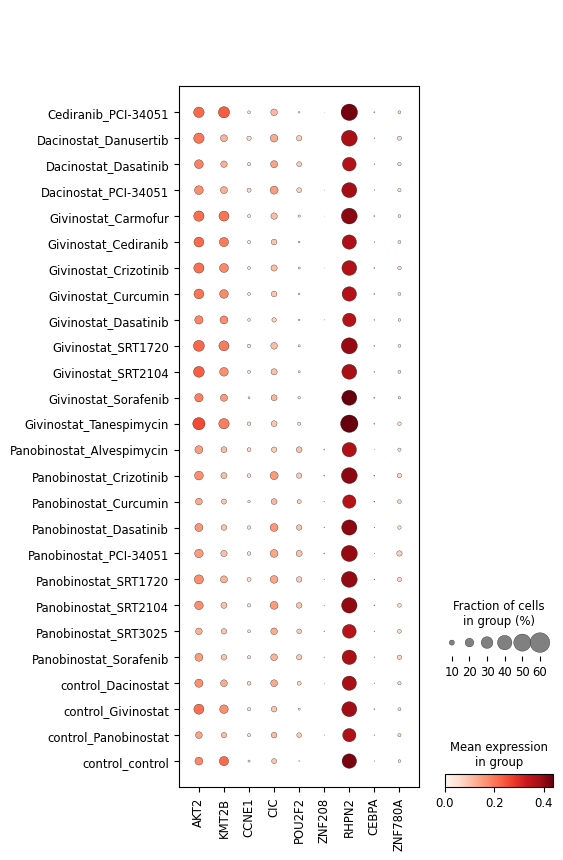

In [32]:
sc.pl.dotplot(adata, var_names = amplification_genes, groupby=["perturbation"])

In [6]:
adata.obs

,sample,Size_Factor,n.umi,RT_well,Drug1,Drug2,Well,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,condition,pathway1,pathway2,split,control,cell_type
Cell,,,,,,,,,,,,,,,,,,,
A01_A02_RT_BC_10_Lig_BC_18,sciPlex_theis,0.533816,1433,RT_10,control,Panobinostat,A10,1004,1004,1433.0,51.0,3.558967,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_25,sciPlex_theis,0.539404,1448,RT_10,control,Panobinostat,A10,1062,1062,1448.0,53.0,3.660221,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_48,sciPlex_theis,0.532326,1429,RT_10,control,Panobinostat,A10,1063,1063,1429.0,39.0,2.729181,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_51,sciPlex_theis,1.461754,3924,RT_10,control,Panobinostat,A10,2412,2411,3923.0,215.0,5.480500,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
A01_A02_RT_BC_10_Lig_BC_70,sciPlex_theis,0.418708,1124,RT_10,control,Panobinostat,A10,834,832,1122.0,48.0,4.278075,1,control+Panobinostat,Vehicle,HDAC inhibitor,train,0,A549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H12_A02_RT_BC_96_Lig_BC_50,sciPlex_theis,0.419081,1125,RT_96,control,Dasatinib,H12,844,844,1125.0,56.0,4.977777,0,control+Dasatinib,Vehicle,EGFR inhibitor,train,0,A549
H12_A02_RT_BC_96_Lig_BC_95,sciPlex_theis,0.816556,2192,RT_96,control,Dasatinib,H12,1513,1513,2192.0,114.0,5.200730,0,control+Dasatinib,Vehicle,EGFR inhibitor,train,0,A549
H12_A02_RT_BC_9_Lig_BC_41,sciPlex_theis,0.453725,1218,RT_9,Dacinostat,Dasatinib,A9,913,913,1218.0,72.0,5.911330,1,Dacinostat+Dasatinib,HDAC inhibitor,EGFR inhibitor,train,0,A549


In [20]:
adata[adata.obs["Drug1"]=="Givinostat"].obs.head()

,sample,Size_Factor,n.umi,RT_well,Drug1,Drug2,Well,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,condition,pathway1,pathway2,split,control,cell_type,perturbation
Cell,,,,,,,,,,,,,,,,,,,,
A01_A02_RT_BC_16_Lig_BC_2,sciPlex_theis,1.298964,3487,RT_16,Givinostat,SRT1720,B4,2154,2152,3485.0,146.0,4.189383,0,Givinostat+SRT1720,HDAC inhibitor,Sirtuin inhibitor,train,0,A549,Givinostat_SRT1720
A01_A02_RT_BC_16_Lig_BC_47,sciPlex_theis,0.638120,1713,RT_16,Givinostat,SRT1720,B4,1281,1281,1713.0,54.0,3.152364,0,Givinostat+SRT1720,HDAC inhibitor,Sirtuin inhibitor,train,0,A549,Givinostat_SRT1720
A01_A02_RT_BC_16_Lig_BC_55,sciPlex_theis,0.636630,1709,RT_16,Givinostat,SRT1720,B4,1269,1268,1708.0,125.0,7.318501,0,Givinostat+SRT1720,HDAC inhibitor,Sirtuin inhibitor,train,0,A549,Givinostat_SRT1720
A01_A02_RT_BC_16_Lig_BC_57,sciPlex_theis,3.330295,8940,RT_16,Givinostat,SRT1720,B4,4199,4198,8939.0,532.0,5.951448,0,Givinostat+SRT1720,HDAC inhibitor,Sirtuin inhibitor,train,0,A549,Givinostat_SRT1720
A01_A02_RT_BC_16_Lig_BC_6,sciPlex_theis,0.847474,2275,RT_16,Givinostat,SRT1720,B4,1584,1581,2272.0,90.0,3.961268,0,Givinostat+SRT1720,HDAC inhibitor,Sirtuin inhibitor,train,0,A549,Givinostat_SRT1720


In [34]:
bdata

View of AnnData object with n_obs × n_vars = 5112 × 27518
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type'
    var: 'id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Drug1_colors', 'Drug2_colors', 'Well_colors', 'condition_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pathway1_colors', 'pathway2_colors', 'pathway_colors', 'pca', 'rank_genes_groups', 'split_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [35]:
bdata.obs["perturbation"] = bdata.obs.apply(lambda x: x["Drug1"]+"_"+x["Drug2"], axis=1)

/tmp/ipykernel_3840415/1001797746.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  bdata.obs["perturbation"] = bdata.obs.apply(lambda x: x["Drug1"]+"_"+x["Drug2"], axis=1)


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


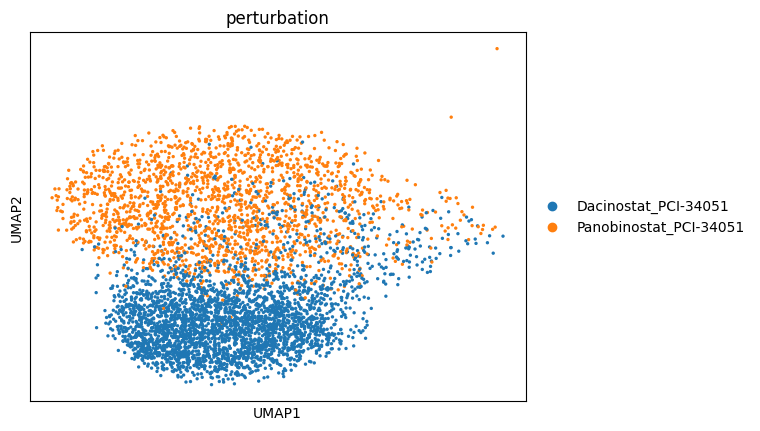

In [36]:
sc.pl.umap(bdata, color="perturbation")

In [38]:
adata.obs["perturbation"].cat.categories

Index(['Cediranib_PCI-34051', 'Dacinostat_Danusertib', 'Dacinostat_Dasatinib',
       'Dacinostat_PCI-34051', 'Givinostat_Carmofur', 'Givinostat_Cediranib',
       'Givinostat_Crizotinib', 'Givinostat_Curcumin', 'Givinostat_Dasatinib',
       'Givinostat_SRT1720', 'Givinostat_SRT2104', 'Givinostat_Sorafenib',
       'Givinostat_Tanespimycin', 'Panobinostat_Alvespimycin',
       'Panobinostat_Crizotinib', 'Panobinostat_Curcumin',
       'Panobinostat_Dasatinib', 'Panobinostat_PCI-34051',
       'Panobinostat_SRT1720', 'Panobinostat_SRT2104', 'Panobinostat_SRT3025',
       'Panobinostat_Sorafenib', 'control_Dacinostat', 'control_Givinostat',
       'control_Panobinostat', 'control_control'],
      dtype='object')

In [68]:
perts_to_keep = ['control_Dacinostat', 'control_Panobinostat', 'Panobinostat_PCI-34051', 'Dacinostat_PCI-34051', 'Cediranib_PCI-34051','control_Givinostat', 'Givinostat_Cediranib']

In [47]:
cdata = adata[adata.obs["perturbation"].isin(perts_to_keep)]

In [54]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200, frameon=False)

In [57]:
adata_full

AnnData object with n_obs × n_vars = 63378 × 27518
    obs: 'sample', 'Size_Factor', 'n.umi', 'RT_well', 'Drug1', 'Drug2', 'Well', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'condition', 'pathway1', 'pathway2', 'split', 'control', 'cell_type'
    var: 'id', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Drug1_colors', 'Drug2_colors', 'Well_colors', 'condition_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pathway1_colors', 'pathway2_colors', 'pathway_colors', 'pca', 'rank_genes_groups', 'split_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [62]:
adata_full.obs['1+2'] = adata_full.obs.Drug1.astype(str) + '_' + adata_full.obs.Drug2.astype(str)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


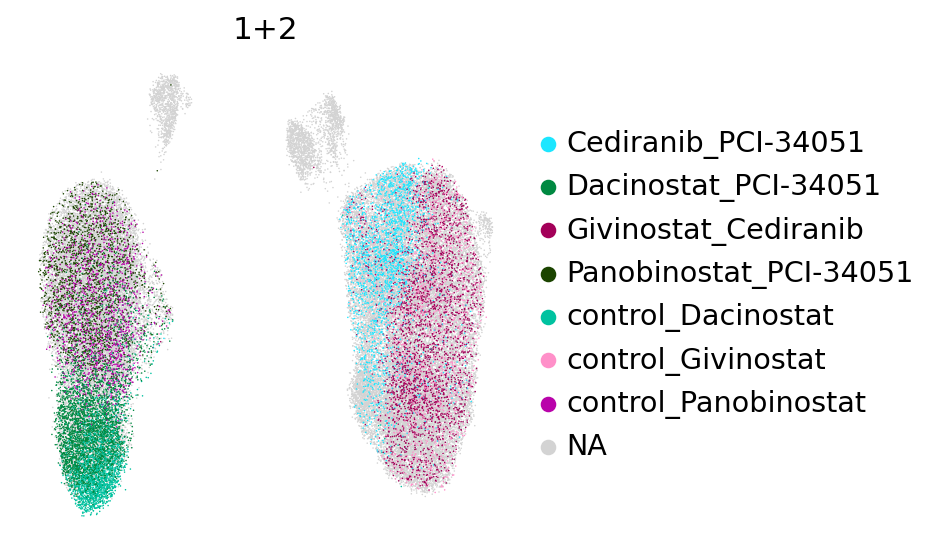

In [69]:
sc.pl.umap(adata_full, color="1+2", groups=perts_to_keep)


In [61]:
adata_full.obs['1+2'].value_counts()

1+2
Dacinostat+PCI-34051         3298
SRT3025+Cediranib            3016
Givinostat+Cediranib         2783
control+SRT2104              2756
Givinostat+Curcumin          2736
Givinostat+Sorafenib         2734
Givinostat+Carmofur          2692
Givinostat+Crizotinib        2662
Givinostat+Dasatinib         2421
Givinostat+SRT2104           2353
control+Dasatinib            2343
Givinostat+SRT1720           2260
Panobinostat+Curcumin        2244
Cediranib+PCI-34051          2161
Panobinostat+Sorafenib       2013
Panobinostat+SRT2104         1971
Panobinostat+Dasatinib       1955
Dacinostat+Danusertib        1939
Panobinostat+SRT3025         1889
control+Dacinostat           1869
Panobinostat+SRT1720         1826
Panobinostat+PCI-34051       1814
control+Givinostat           1682
Panobinostat+Crizotinib      1641
control+Panobinostat         1578
control+control              1451
Givinostat+Tanespimycin      1310
Dacinostat+Dasatinib         1231
Panobinostat+Alvespimycin     996
control+Al